## Play Ground

In [325]:
# Example in Chapter definition 4.10
import math
def calculate_uncertainty(probabilities, k):
    uncertainty = k * sum(p * math.log2(p) for p in probabilities)
    return uncertainty

# Example usage
probabilities = [0.7, 0.27, 0.03]
k = 1000
uncertainty = calculate_uncertainty(probabilities, k)
print("Uncertainty:", uncertainty)

# surprise: individual uncertainty for event 3
surprise = math.log2(probabilities[2])
print("Surprise:", surprise)

Uncertainty: -1021.989577307477
Surprise: -5.058893689053568


In [326]:
# Law 5.1

probabilities = [0.5, 0.3, 0.2]
k = 10000
uncertainty = calculate_uncertainty(probabilities, k)
print("Uncertainty:", uncertainty)

Uncertainty: -14854.752972273343


In [327]:
def counting_theorem(n, d):
    if n == 0 or d == 0:
        return 0
    elif n == 1 or d == 1:
        return 2
    else:
        return counting_theorem(n-1, d) + counting_theorem(n-1, d-1)
    
print(counting_theorem(4, 3))


14


### 6.1 (a) (b)

In [24]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

def generate_random_points_and_labels(n_points, n_features, c_classes):
    # Generate random points with n_features
    np.random.seed(2)
    X = np.random.rand(n_points, n_features)
    # Generate random labels with c equi-distributed classes
    labels = np.random.choice(range(c_classes), n_points)
    return X, labels

def get_number_of_thresholds(data, labels):
    table = [(np.sum(row), label) for row, label in zip(data, labels)]
    sorted_table = sorted(table, key=lambda x: x[0])
    thresholds = 0
    previous_label = None
    for data_sum, label in sorted_table:
        if label != previous_label:
            previous_label = label
            thresholds += 1
    return thresholds

def train_nearest_neighbors(X_train, y_train):
    # Train a nearest neighbors classifier
    clf = KNeighborsClassifier(n_neighbors=1)  # Using 1-NN for simplicity
    clf.fit(X_train, y_train)
    return clf

def get_number_of_instances_memorized(X_test, y_test, clf):
    # Predict the labels for the test set
    y_pred = clf.predict(X_test)
    # For 1-NN, we'll consider the number of correctly classified instances as memorized instances
    memorized_instances = np.sum(y_pred == y_test)
    return memorized_instances

def main(n_points=10000, n_features=2, c_classes=3):
    # Step 1: Generate random points and labels
    X, labels = generate_random_points_and_labels(n_points, n_features, c_classes)

    # Step 2: Train the nearest neighbors classifier
    clf = train_nearest_neighbors(X, labels)

    # Step 3: Information Capacity
    thresholds = get_number_of_thresholds(X, labels)
    memorized_instances = get_number_of_instances_memorized(X, labels, clf)
    info_capacity = memorized_instances / thresholds
    print(f"Information Capacity: {info_capacity:.3f} bits per parameter for  {c_classes}-class classification problem.")

if __name__ == "__main__":
    main(n_points=100000, n_features=10, c_classes=2)
    main(n_points=100000, n_features=10, c_classes=3)
    main(n_points=100000, n_features=10, c_classes=4)
    main(n_points=100000, n_features=10, c_classes=5)
    main(n_points=100000, n_features=10, c_classes=6)

# c/c-1 4/3

Information Capacity: 1.995 bits per parameter for  2-class classification problem.
Information Capacity: 1.502 bits per parameter for  3-class classification problem.
Information Capacity: 1.330 bits per parameter for  4-class classification problem.
Information Capacity: 1.254 bits per parameter for  5-class classification problem.
Information Capacity: 1.200 bits per parameter for  6-class classification problem.


In [329]:
## generate data X (n_points, n_features) 000 001 010 011 100 101 110 111
def generate_data(n_points, n_features):
    data = np.zeros((n_points, n_features))
    for i in range(n_points):
        for j in range(n_features):
            data[i, j] = i >> j & 1
    return data
generate_data(8, 3)

array([[0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 1., 0.],
       [0., 0., 1.],
       [1., 0., 1.],
       [0., 1., 1.],
       [1., 1., 1.]])

In [378]:
import numpy as np
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

def generate_random_points(n_points, n_features):
    # X = np.random.rand(n_points, n_features)
    X = np.random.randint(0, 2, (n_points, n_features))
    return X

def generate_data(n_points, n_features):
    data = np.zeros((n_points, n_features))
    for i in range(n_points):
        for j in range(n_features):
            data[i, j] = i >> j & 1
    return data

def generate_random_labels(n_points, c_classes):
    labels = np.random.choice(range(c_classes), n_points)
    return labels

def generate_unique_random_labels(n_points, c_classes, n_labelings):
    unique_labelings = set()
    while len(unique_labelings) < n_labelings:
        # Generate a random labeling
        labels = tuple(np.random.choice(range(c_classes), n_points))
        unique_labelings.add(labels)

    # Convert each tuple back to a numpy array
    unique_labelings = [np.array(labels) for labels in unique_labelings]
    return unique_labelings

def condensed_nearest_neighbor(X, y):
    S_indices = [0]
    changed = True
    while changed:
        changed = False
        for i in range(len(X)):
            if i in S_indices:
                continue       
            # Train a 1-NN classifier on the current condensed set
            S = X[S_indices]
            S_labels = y[S_indices]
            knn = KNeighborsClassifier(n_neighbors=1)
            knn.fit(S, S_labels)
            # Predict the label of the current point
            pred = knn.predict([X[i]])[0]
            # If the prediction is incorrect, add the point to the condensed set
            if pred != y[i]:
                S_indices.append(i)
                changed = True
    return len(S_indices)

def main(d, num_function, c_classes):
    n = 2**d
    avg_mem_size = 0
    X = generate_data(n, d)
    # Y = generate_unique_random_labels(n, c_classes, num_function)
    for i in range(num_function):
        labels = generate_random_labels(n, c_classes)
        req_points = condensed_nearest_neighbor(X, labels)
        avg_mem_size += req_points
    avg_mem_size /= num_function
    print(f"d={d}: n_full={2**d}, \
          Avg. req. points for memorization n_avg={avg_mem_size:.2f}, \
          n_full/n_avg={(2**d)/avg_mem_size}")

if __name__ == "__main__":
    main(d=2, num_function=16, c_classes=2)
    main(d=4, num_function=32, c_classes=2)
    # main(d=6, num_function=64, c_classes=2)
    # main(d=7, num_function=2**7, c_classes=2)
    main(d=8, num_function=64, c_classes=2)



d=2: n_full=4,           Avg. req. points for memorization n_avg=2.81,           n_full/n_avg=1.4222222222222223
d=4: n_full=16,           Avg. req. points for memorization n_avg=8.78,           n_full/n_avg=1.8220640569395017
d=8: n_full=256,           Avg. req. points for memorization n_avg=170.53,           n_full/n_avg=1.5011911306578707


In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

def condensed_nearest_neighbor(X, y):
    # Initialize S with one example from each class (optional)
    unique_labels = np.unique(y)
    S_indices = [np.where(y == label)[0][0] for label in unique_labels]
    
    changed = True
    while changed:
        changed = False
        for i in range(len(X)):
            if i in S_indices:
                continue  # Skip if already in S
            S = X[S_indices]
            S_labels = y[S_indices]
            knn = KNeighborsClassifier(n_neighbors=1)
            knn.fit(S, S_labels)
            pred = knn.predict([X[i]])[0]
            if pred != y[i]:
                S_indices.append(i)
                changed = True
                
    return X[S_indices], y[S_indices]

# Example use
# Generate random data
d = 8
n = 2 ** d
X = generate_data(n, d)
y = np.random.choice([0, 1], n)  # Ensure y has the same length as X

X_condensed, y_condensed = condensed_nearest_neighbor(X, y)
print(f"Original dataset size: {len(X)}, Condensed dataset size: {len(X_condensed)}")

# Test the condensed dataset
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_condensed, y_condensed)
print(f"Accuracy on original dataset: {knn.score(X, y):.2f}")
# print ratio
print(f"Ratio: {len(X)/len(X_condensed)}")

Original dataset size: 256, Condensed dataset size: 183
Accuracy on original dataset: 1.00
Ratio: 1.3989071038251366


### 6.2 (a)

----- Dataset -----
Number of features: 30
Number of training instances: 455
Number of testing instances: 114
----- Default Scikit-learn decision tree -----
Number of if-then clauses: 15
Accuracy: 0.95


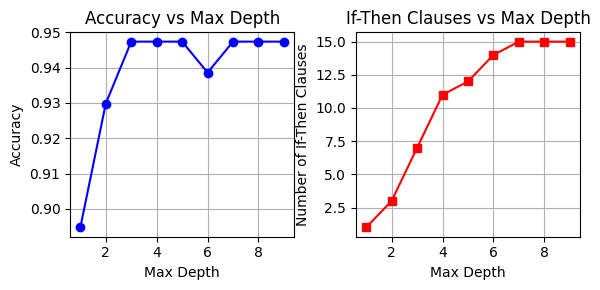

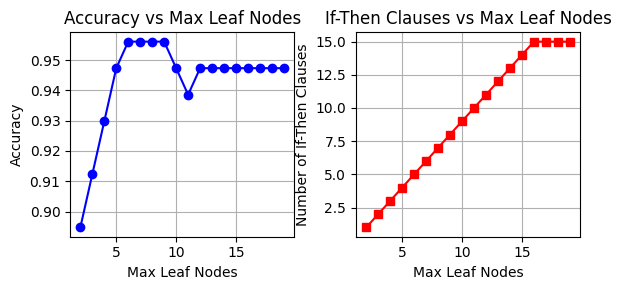

In [28]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

# Load breast cancer binary dataset from sklearn
print(f"----- Dataset -----")
data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Number of features: {len(data.feature_names)}")
print(f"Number of training instances: {len(X_train)}")
print(f"Number of testing instances: {len(X_test)}")

# Train a decision tree classifier and evaluate its accuracy
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Extract if-then rules
rules = export_text(clf, feature_names=list(data.feature_names))

# Function to count the number of if-then clauses (non-leaf nodes)
def count_if_then_clauses(tree):
    n_nodes = tree.node_count
    children_left = tree.children_left
    children_right = tree.children_right
    if_then_clauses = 0
    for i in range(n_nodes):
        if children_left[i] != -1 or children_right[i] != -1:
            if_then_clauses += 1
    return if_then_clauses

# Count the non-leaf nodes in the decision tree
num_if_then_clauses = count_if_then_clauses(clf.tree_)
print(f"----- Default Scikit-learn decision tree -----")
print(f"Number of if-then clauses: {num_if_then_clauses}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
# tree.plot_tree(clf, fontsize=2)
# plt.show()

# Strategy 1: Limit Tree Depth
depths = range(1, 10)
accuracies_depth = []
clauses_depth = []

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    num_if_then_clauses = count_if_then_clauses(clf.tree_)
    accuracies_depth.append(accuracy_score(y_test, y_pred))
    clauses_depth.append(num_if_then_clauses)

# Plot for Strategy 1
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.plot(depths, accuracies_depth, marker='o', linestyle='-', color='b', label='Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(depths, clauses_depth, marker='s', linestyle='-', color='r', label='If-Then Clauses')
plt.xlabel('Max Depth')
plt.ylabel('Number of If-Then Clauses')
plt.title('If-Then Clauses vs Max Depth')
plt.grid(True)

plt.tight_layout()
plt.show()

# Strategy 2: Limit Number of Leaf Nodes
leaf_nodes = range(2, 20)
accuracies_leaf = []
clauses_leaf = []

for max_leaf_nodes in leaf_nodes:
    clf = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    num_if_then_clauses = count_if_then_clauses(clf.tree_)
    accuracies_leaf.append(accuracy_score(y_test, y_pred))
    clauses_leaf.append(num_if_then_clauses)

# Plot for Strategy 2
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.plot(leaf_nodes, accuracies_leaf, marker='o', linestyle='-', color='b', label='Accuracy')
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Leaf Nodes')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(leaf_nodes, clauses_leaf, marker='s', linestyle='-', color='r', label='If-Then Clauses')
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Number of If-Then Clauses')
plt.title('If-Then Clauses vs Max Leaf Nodes')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

# Load breast cancer binary dataset from sklearn
print(f"----- Dataset -----")
data = load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Name of features: {data.feature_names}")
print(f"Number of features: {len(data.feature_names)}")
print(f"Number of training instances: {len(X_train)}")
print(f"Number of testing instances: {len(X_test)}")


# Train a decision tree classifier and evaluate its accuracy
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Extract if-then rules
rules = export_text(clf, feature_names=list(data.feature_names))

# Function to count the number of if-then clauses (non-leaf nodes)
def count_if_then_clauses(tree):
    n_nodes = tree.node_count
    children_left = tree.children_left
    children_right = tree.children_right
    if_then_clauses = 0
    for i in range(n_nodes):
        if children_left[i] != -1 or children_right[i] != -1:
            if_then_clauses += 1
    return if_then_clauses

# Count the non-leaf nodes in the decision tree
num_if_then_clauses = count_if_then_clauses(clf.tree_)
print(f"----- Default Scikit-learn decision tree -----")
print(f"Number of if-then clauses: {num_if_then_clauses}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")



# Strategy 1: Limit Tree Depth
for depth in range(1, 5):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    num_if_then_clauses = count_if_then_clauses(clf.tree_)
    print(f"----- Decision tree with max_depth={depth} -----")
    print(f"Number of if-then clauses: {num_if_then_clauses}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Strategy 2: Limit Number of Leaf Nodes
for max_leaf_nodes in range(2, 15):
    clf = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    num_if_then_clauses = count_if_then_clauses(clf.tree_)
    print(f"----- Decision tree with max_leaf_nodes={max_leaf_nodes} -----")
    print(f"Number of if-then clauses: {num_if_then_clauses}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

# Load breast cancer binary dataset from sklearn
print(f"----- Dataset -----")
def generate_random_binary_dataset(n_samples=1000, n_features=2):
    X = np.random.rand(n_samples, n_features)
    y = np.random.randint(2, size=n_samples)
    return X, y
X, y = generate_random_binary_dataset()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Number of features: {len(data.feature_names)}")
print(f"Number of training instances: {len(X_train)}")
print(f"Number of testing instances: {len(X_test)}")


# Train a decision tree classifier and evaluate its accuracy
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Function to count the number of if-then clauses (non-leaf nodes)
def count_if_then_clauses(tree):
    n_nodes = tree.node_count
    children_left = tree.children_left
    children_right = tree.children_right
    if_then_clauses = 0
    for i in range(n_nodes):
        if children_left[i] != -1 or children_right[i] != -1:
            if_then_clauses += 1
    return if_then_clauses

# Count the non-leaf nodes in the decision tree
num_if_then_clauses = count_if_then_clauses(clf.tree_)
print(f"----- Default Scikit-learn decision tree -----")
print(f"Number of if-then clauses: {num_if_then_clauses}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Training score: {clf.score(X_train, y_train):.2f}")



# Strategy 1: Limit Tree Depth
for depth in range(15,20):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    num_if_then_clauses = count_if_then_clauses(clf.tree_)
    print(f"----- Decision tree with max_depth={depth} -----")
    print(f"Number of if-then clauses: {num_if_then_clauses}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Training score: {clf.score(X_train, y_train):.2f}")

# Strategy 2: Limit Number of Leaf Nodes
for max_leaf_nodes in range(2, 15):
    clf = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    num_if_then_clauses = count_if_then_clauses(clf.tree_)
    print(f"----- Decision tree with max_leaf_nodes={max_leaf_nodes} -----")
    print(f"Number of if-then clauses: {num_if_then_clauses}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Training score: {clf.score(X_train, y_train):.2f}")

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# Generate a completely random dataset
X, y = np.random.rand(1000, 10), np.random.randint(2, size=1000)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print(f"Training accuracy: {train_score*100:.2f}%")
print(f"Testing accuracy: {test_score*100:.2f}%")


Training accuracy: 100.00%
Testing accuracy: 56.00%


### 6.3 (a)

In [ ]:
import zlib
import numpy as np
import string
import random


# Generate a long random string
# random_string = ''.join(np.random.choice(['A', 'C', 'G', 'T'], size=100))
# Generate a list of all ASCII characters from 0 to 127
# all_chars = ''.join(chr(i) for i in range(128))
# length_of_string = 1000000
# random_string = ''.join(random.choices(all_chars, k=length_of_string))

def generate_full_utf8_string(length=1000):
    # Unicode ranges: U+0000 to U+D7FF and U+E000 to U+10FFFF
    all_chars = [chr(i) for i in range(0x0000, 0xD800)]
    all_chars.extend(chr(i) for i in range(0xE000, 0x110000))

    # Generate random string
    random_string = ''.join(random.choices(all_chars, k=length))
    return random_string

# Specify the desired length of the random string
length_of_string = 1000000
random_string = generate_full_utf8_string(length_of_string)

# Convert the string to bytes
random_string_bytes = random_string.encode('utf-8')

# Compress the string using zlib
compressed_string = zlib.compress(random_string_bytes)

# Calculate the compression ratio
compression_ratio = len(compressed_string) / len(random_string_bytes)

compression_ratio


0.7611419959047694

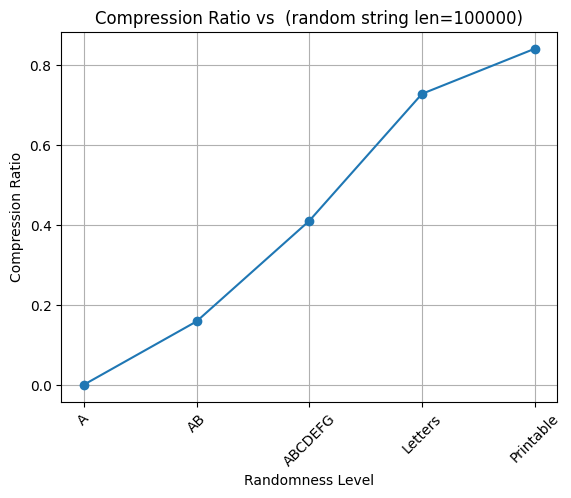

In [ ]:
import zlib
import numpy as np
import matplotlib.pyplot as plt

def compress_string(input_string):
    """Compress a string and return the size of the compressed data."""
    compressed_data = zlib.compress(input_string.encode('utf-8'))
    return len(compressed_data)

def generate_random_string(length, alphabet):
    """Generate a random string of a given length from the specified alphabet."""
    return ''.join(np.random.choice(list(alphabet), length))

# Define different levels of randomness by specifying alphabets
alphabets = [
    'A',  # Least random: all characters are the same
    'AB',  # Low randomness: two possible characters
    'ABCDEFG',
    string.ascii_letters,  # Moderate randomness: all letters
    string.printable,  # Higher randomness: letters, digits, punctuation
]

length_of_string = 100000
compression_ratios = []

for alphabet in alphabets:
    random_string = generate_random_string(length_of_string, alphabet)
    compressed_size = compress_string(random_string)
    compression_ratio = compressed_size/len(random_string.encode('utf-8'))
    compression_ratios.append(compression_ratio)

# Plotting the compression ratios
plt.plot(compression_ratios, marker='o')
plt.title('Compression Ratio vs  (random string len=100000)')
plt.ylabel('Compression Ratio')
plt.xlabel('Randomness Level')
plt.xticks(range(len(alphabets)), ['A', 'AB', 'ABCDEFG', 'Letters', 'Printable'], rotation=45)
plt.grid(True)
plt.show()


The expected compression ratio for a random string, especially one composed of a small set of characters (like 'A', 'C', 'G', 'T' in the case of our DNA sequence example), can vary significantly depending on several factors, including the length of the string, the distribution of characters, and the compression algorithm used. However, random data or sequences with high entropy (where each character is equally likely and independent of the others) are generally hard to compress effectively because the essence of lossless compression is to find and exploit patterns, redundancy, or predictability in the data.

For the example given, where the string is generated from an equal distribution of four characters, we might expect a lower compression ratio than highly redundant or patterned data. This is because, even though there are repeating characters, the randomness and uniform distribution reduce the predictability and hence the compressibility of the sequence. 

Compression algorithms like zlib implement a combination of strategies (such as dictionary-based compression in DEFLATE, which zlib uses) to reduce data size. These strategies work best when the data has noticeable patterns or redundancy. In the case of a truly random sequence, the compression algorithm might struggle to find useful patterns to exploit, leading to less significant compression. 

The observed compression ratio of approximately 0.3195 suggests that zlib was able to find some patterns or redundancies to exploit, possibly due to the limited character set, even though the sequence was intended to be random. This ratio might not be as good as for data with more obvious patterns (like repeated sequences or large blocks of identical characters) but is still notable given the randomness of the input.

It's important to note that for truly random data, the theoretical best compression you could expect (without losing information) is very minimal, due to the Shannon entropy of the data being high. In practical terms, this means that the more random and less predictable the data, the closer the compression ratio will approach 1 (no compression), after accounting for the overhead of the compression algorithm itself.

In [ ]:
import numpy as np

def memorize(data, labels):
    """
    Function to calculate the minimum encoding cost (mec) for given data and labels.
    
    Parameters:
    data (np.array): An array of n d-dimensional vectors.
    labels (np.array): A column of 0s or 1s with length n.
    
    Returns:
    float: The minimum encoding cost (mec).
    """
    # Calculate the sum for each row and pair it with its label
    table = [(np.sum(row), label) for row, label in zip(data, labels)]
    
    # Sort the table based on the sum (column 0)
    sorted_table = sorted(table, key=lambda x: x[0])
    
    # Initialize variables
    thresholds = 0
    class_ = 0
    
    # Determine the number of threshold changes
    for row in sorted_table:
        if row[1] != class_:
            class_ = row[1]
            thresholds += 1
    # Calculate the minimum number of thresholds
    min_threshs = np.log2(thresholds + 1)
    
    # Calculate minimum encoding cost
    mec = (min_threshs * (data.shape[1] + 1)) + (min_threshs + 1)
    
    return mec

# Example usage
n = 100
d = 5
np.random.seed(42)
data = np.random.rand(n, d)  # n d-dimensional vectors
labels = np.random.randint(2, size=n)  # n binary labels
mec = memorize(data, labels)
mec

40.30296890880646

In [ ]:
# Modification for multi-class labels

def memorize_multiclass(data, labels):
    """
    Function to calculate the minimum encoding cost (mec) for given data and labels for multi-class classification.
    
    Parameters:
    data (np.array): An array of n d-dimensional vectors.
    labels (np.array): A column of labels with length n, for multi-class classification.
    
    Returns:
    float: The minimum encoding cost (mec).
    """
    # Calculate the sum for each row and pair it with its label
    table = [(np.sum(row), label) for row, label in zip(data, labels)]
    
    # Sort the table based on the sum (column 0)
    sorted_table = sorted(table, key=lambda x: x[0])
    
    # Initialize variables
    thresholds = 0
    previous_label = None
    
    # Determine the number of threshold changes
    for data_sum, label in sorted_table:
        if label != previous_label:
            previous_label = label
            thresholds += 1
    # Calculate the minimum number of thresholds
    min_threshs = np.log2(thresholds + 1)
    
    # Calculate minimum encoding cost
    d = data.shape[1]
    mec = (min_threshs * (d + 1)) + (min_threshs + 1)
    
    return mec

# Example usage with multi-class labels
n = 100
d = 5
np.random.seed(42)
data = np.random.rand(n, d)  # n d-dimensional vectors
labels = np.random.randint(2, size=n)  # n labels for multi-class classification

mec_multiclass = memorize_multiclass(data, labels)
mec_multiclass


40.30296890880646

### 9.1

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

# Data preparation
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [3]:
def dataset_to_ndarray(dataset):
    data = []
    labels = []
    for image, label in dataset:
        np_image = image.numpy().flatten()
        data.append(np_image)
        labels.append(label)
    data = np.array(data)
    labels = np.array(labels)
    return data, labels
data, labels = dataset_to_ndarray(train_dataset)

NameError: name 'np' is not defined

In [ ]:
import numpy as np
def Compute_upper_bound_MEC(data, labels):
    table = [(np.sum(row), label) for row, label in zip(data, labels)]
    sorted_table = sorted(table, key=lambda x: x[0])
    thresholds = 0
    class_ = 0
    for row in sorted_table:
        if row[1] != class_:
            class_ = row[1]
            thresholds += 1
    min_threshs = np.log2(thresholds + 1) * np.log2(10)
    mec = (min_threshs * (data.shape[1] + 1)) + min_threshs
    return mec

Compute_upper_bound_MEC(data, labels)

3693.6497550262843

In [4]:
# Define a flexible CNN model
class CustomCNN(nn.Module):
    def __init__(self, conv_layers, linear_layers, dropout_rate=0.5):
        super(CustomCNN, self).__init__()
        self.layers = nn.ModuleList()

        # Add convolutional layers
        for in_channels, out_channels, kernel_size, stride, padding in conv_layers:
            self.layers.append(nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding))
            self.layers.append(nn.BatchNorm2d(out_channels))
            self.layers.append(nn.ReLU(inplace=True))
            self.layers.append(nn.MaxPool2d(kernel_size=2, stride=2))

        self.layers.append(nn.Flatten())

        # Add linear layers
        for in_features, out_features in linear_layers[:-1]:
            self.layers.append(nn.Linear(in_features, out_features))
            self.layers.append(nn.ReLU(inplace=True))
            self.layers.append(nn.Dropout(dropout_rate))

        # Add the final linear layer without dropout
        in_features, out_features = linear_layers[-1]
        self.layers.append(nn.Linear(in_features, out_features))

    def forward(self, x):
        # print(f"Input size: {x.size()}")
        for layer in self.layers:
            x = layer(x)
            # print(f"After {layer.__class__.__name__}: {x.size()}")
        return x

# Hyperparameters and model configuration
# Conv_layer: in_channels, out_channels, kernel_size, stride, padding
# Linear_layer: in_features, out_features
    
# Model 1
conv_layers_1 = [(1, 32, 3, 1, 1),(32, 64, 3, 1, 1)]
linear_layers_1 = [(7*7*64, 128),(128, 10)]

# Model 2
conv_layers_2 = [(1, 16, 3, 1, 1),(16, 32, 3, 1, 1)]
linear_layers_2 = [(7*7*32, 128),(128, 10)]

# Model 3
conv_layers_3 = [(1, 4, 3, 1, 1),(4, 8, 3, 1, 1)]
linear_layers_3 = [(7*7*8, 128),(128, 10)]

# Model 4
conv_layers_4 = [(1, 2, 3, 1, 1),(2, 4, 3, 1, 1)]
linear_layers_4 = [(7*7*4, 128),(128, 10)]

# Model 5
conv_layers_5 = [(1, 2, 3, 1, 1),(2, 1, 3, 1, 1)]
linear_layers_5 = [(7*7*1, 128),(128, 10)]


In [18]:
# Compute MEC of the Decision Layer (Fully connected layer)
import math
def compute_information_from_train_table(train_dataset):
    digit_counts = [0] * 10
    for _, target in train_dataset:
        digit_counts[target] += 1
    total_samples = len(train_dataset)
    digit_probabilities = [count / total_samples for count in digit_counts]
    uncertainty = total_samples * sum(p * math.log2(p) for p in digit_probabilities)
    print(f"total_samples: {total_samples}")
    return - int(uncertainty)

def compute_MEC_of_decision_layer(linear_layer):
    input_size = linear_layer[0][0]
    hidden_size = linear_layer[0][1]
    return (input_size+1) * hidden_size + hidden_size

def compute_G_total(linear_layer):
    flatten_size = linear_layer[0][0]
    return (28*28*1)/flatten_size

for i, model_config in enumerate(model_hyperparameters):
    MEC_decision_layer = compute_MEC_of_decision_layer(model_config[1])
    G_total = compute_G_total(model_config[1])
    total_information = compute_information_from_train_table(train_dataset)
    bits_information_arriving_at_decision_layer = total_information/G_total if G_total >= 1 else total_information
    print(f"Model {i+1}")
    print(f"MEC of the Decision Layer: {MEC_decision_layer}")
    print(f"total_information from train table: {total_information}")
    print(f"G_total: {G_total}")
    print(f"bits_information_arriving_at_decision_layer: {bits_information_arriving_at_decision_layer}")



total_samples: 60000
Model 1
MEC of the Decision Layer: 401664
total_information from train table: 199192
G_total: 0.25
bits_information_arriving_at_decision_layer: 199192
total_samples: 60000
Model 2
MEC of the Decision Layer: 200960
total_information from train table: 199192
G_total: 0.5
bits_information_arriving_at_decision_layer: 199192
total_samples: 60000
Model 3
MEC of the Decision Layer: 50432
total_information from train table: 199192
G_total: 2.0
bits_information_arriving_at_decision_layer: 99596.0
total_samples: 60000
Model 4
MEC of the Decision Layer: 25344
total_information from train table: 199192
G_total: 4.0
bits_information_arriving_at_decision_layer: 49798.0
total_samples: 60000
Model 5
MEC of the Decision Layer: 6528
total_information from train table: 199192
G_total: 16.0
bits_information_arriving_at_decision_layer: 12449.5


In [8]:
# Run training and evaluation
# Training loop
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    loss_array = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")
        loss_array.append(running_loss/len(train_loader))
    return loss_array

# Evaluation function
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy: {100 * correct / total}%')


In [19]:
model_hyperparameters = [(conv_layers_1, linear_layers_1), (conv_layers_2, linear_layers_2), (conv_layers_3, linear_layers_3), (conv_layers_4, linear_layers_4),(conv_layers_5, linear_layers_5)]

In [20]:
for i, model_config in enumerate(model_hyperparameters):
    print(f"Model {i+1}")
    model = CustomCNN(model_config[0], model_config[1], dropout_rate=0.5)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    loss = train_model(model, train_loader, criterion, optimizer, num_epochs=10)
    all_losses.append(loss)
    evaluate_model(model, test_loader)

Model 1
Epoch 1, Loss: 0.23034967899497258
Epoch 2, Loss: 0.10351211336880192
Epoch 3, Loss: 0.08224073881015324
Epoch 4, Loss: 0.07283975581662344
Epoch 5, Loss: 0.0629482440350613
Epoch 6, Loss: 0.05333233733305525
Epoch 7, Loss: 0.04998193595380679
Epoch 8, Loss: 0.04281991134604453
Epoch 9, Loss: 0.03982960328152319
Epoch 10, Loss: 0.03678636104937694
Accuracy: 99.18%
Model 2
Epoch 1, Loss: 0.23539584903801078
Epoch 2, Loss: 0.09677882087744598
Epoch 3, Loss: 0.0762979111895819
Epoch 4, Loss: 0.06657661130177235
Epoch 5, Loss: 0.0589026363309858
Epoch 6, Loss: 0.05000267236102333
Epoch 7, Loss: 0.04786981585304509
Epoch 8, Loss: 0.043196215444350684
Epoch 9, Loss: 0.040369599157275865
Epoch 10, Loss: 0.035176751892242994
Accuracy: 99.08%
Model 3
Epoch 1, Loss: 0.3001223847524189
Epoch 2, Loss: 0.12696030488146393
Epoch 3, Loss: 0.10211848554515175
Epoch 4, Loss: 0.08996455737901951
Epoch 5, Loss: 0.08093551909506345
Epoch 6, Loss: 0.07349242187335468
Epoch 7, Loss: 0.06751325729388

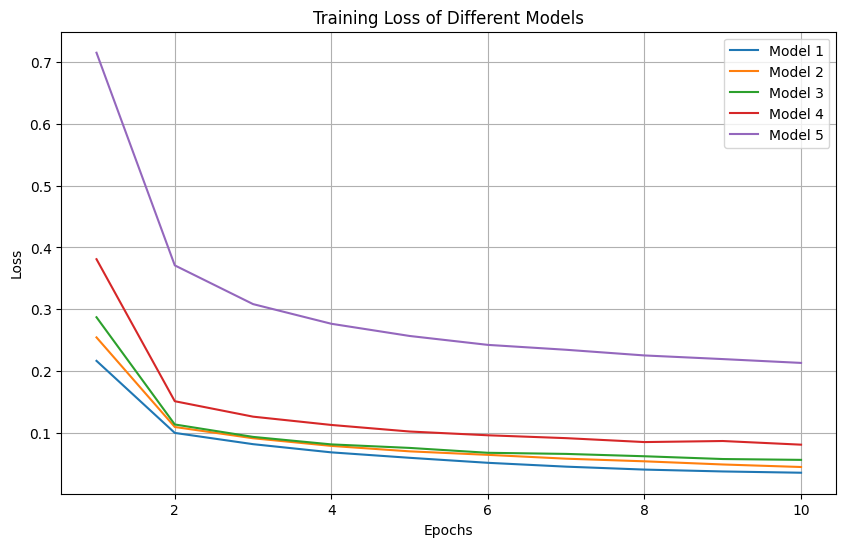

In [14]:
import matplotlib.pyplot as plt
# Number of epochs to train each model, assuming it's the same for all
num_epochs = 10

# Plotting the losses
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size as needed
for i, losses in enumerate(all_losses):
    epochs = list(range(1, num_epochs + 1))
    plt.plot(epochs, losses, label=f'Model {i+1}')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss of Different Models')
plt.legend()
plt.grid(True)
plt.show()
